In [1]:
import sys
import pyccl as ccl
import pickle
import camb
sys.path.insert(0,'./')
# from importlib import reload

In [2]:
from distributed import LocalCluster
from dask.distributed import Client  # we already had this above
#http://distributed.readthedocs.io/en/latest/_modules/distributed/worker.html
c=LocalCluster(n_workers=1,processes=False,memory_limit='25gb',threads_per_worker=14,memory_spill_fraction=.99,
               memory_monitor_interval='2000ms')
client=Client(c)

In [3]:
from skylens import *
from survey_utils import *

In [4]:
#only for python3
import importlib
reload=importlib.reload

In [5]:
zs=lsst_source_tomo_bins()
corr_ll=('shear', 'shear')

ns0:  27.0


In [6]:
wigner_files={}
wigner_files[0]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr'
wigner_files[2]= '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'



# Power Spectrum covariance

In [7]:
#setup parameters
lmax_cl=200
lmin_cl=2
l0=np.arange(lmin_cl,lmax_cl)

lmin_cl_Bins=lmin_cl+10
lmax_cl_Bins=lmax_cl-10
Nl_bins=20
l_bins=np.int64(np.logspace(np.log10(lmin_cl_Bins),np.log10(lmax_cl_Bins),Nl_bins))
lb=np.sqrt(l_bins[1:]*l_bins[:-1])

l=np.unique(np.int64(np.logspace(np.log10(lmin_cl),np.log10(lmax_cl),Nl_bins*20))) #if we want to use fewer ell

do_cov=True
bin_cl=True

SSV_cov=True
tidal_SSV_cov=False
Tri_cov=True

bin_xi=True
theta_bins=np.logspace(np.log10(1./60),1,20)

##  Test with 1 redshift bin

In [8]:
store_win=True
window_lmax=200

In [9]:
use_window=True
do_cov=True

In [10]:
z0=1 #1087
zs_bin1=source_tomo_bins(zp=[z0],p_zp=np.array([1]),ns=30,use_window=use_window,nside=1024)

indxs:  None None
Win gen: step size 2137
Window done


./cov_utils.py:58: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th
./angular_power_spectra.py:26: RuntimeWarning: divide by zero encountered in true_divide
  self.cl_f=(l+0.5)**2/(l*(l+1.)) # cl correction from Kilbinger+ 2017


cl dict done dict_keys([('galaxy', 'galaxy')])


/Users/Deep/anaconda/envs/py36/lib/python3.6/site-packages/healpy/sphtfunc.py:401: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning,


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


In [11]:
use_binned_l=False

In [12]:
a={'a':1,'b':2}

In [13]:
kk=list(a.keys())
ii=len(kk)

In [14]:
[(kk[i],kk[j]) for i in np.arange(ii) for j in np.arange(i,ii)]

[('a', 'a'), ('a', 'b'), ('b', 'b')]

In [15]:
import skylens
reload(skylens)
from skylens import *

In [16]:
store_win=True

In [17]:
#use all ell
kappa0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       use_binned_l=use_binned_l,wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax
                                       )

indxs:  None None
Win gen: step size 199
wigner_files: {0: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr', 2: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: 'inproc://192.168.86.48/62831/1' processes=1 threads=14, memory=25.00 GB>
got window cls, now to coupling matrices.
done coupling submatrix  0 4.028526067733765 3.0625529289245605 0.9659719467163086
Window done


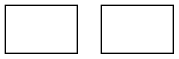

In [18]:
dask.visualize(kappa0.Win.Win)

In [19]:
%time cl0G=kappa0.cl_tomo() 

cl dict done dict_keys([('shear', 'shear')])
CPU times: user 21.6 s, sys: 4.77 s, total: 26.4 s
Wall time: 22.5 s


In [20]:
kappa0.l.shape

(198,)

In [21]:
%time cl0=cl0G['stack'].compute()

CPU times: user 55.5 ms, sys: 97.8 ms, total: 153 ms
Wall time: 47.1 ms


In [22]:
cl0

{'cov': array([[1.85895635e-17, 4.45544971e-18, 3.79831699e-19, 8.97048876e-20,
         4.19797269e-20, 2.49447502e-20, 1.31687783e-20, 9.32136083e-21,
         6.92053753e-21, 5.31610601e-21, 4.23110644e-21, 3.39333092e-21,
         2.75142167e-21, 2.25097551e-21, 1.85936344e-21, 1.54058397e-21,
         1.28185064e-21, 1.06707274e-21, 8.89413466e-22],
        [4.45544971e-18, 9.90288571e-18, 2.26145521e-18, 2.00128149e-19,
         6.22363952e-20, 2.76660047e-20, 1.42796839e-20, 9.29959366e-21,
         6.49148421e-21, 5.01958779e-21, 3.91077914e-21, 3.13803421e-21,
         2.53505735e-21, 2.06722466e-21, 1.70190999e-21, 1.40804276e-21,
         1.16805881e-21, 9.70932611e-22, 8.07275553e-22],
        [3.79831699e-19, 2.26145521e-18, 9.66261963e-18, 1.75032447e-18,
         1.39271095e-19, 4.04053621e-20, 1.61539909e-20, 9.27326451e-21,
         6.29050610e-21, 4.59988250e-21, 3.58898480e-21, 2.85679479e-21,
         2.30500832e-21, 1.87119183e-21, 1.53485625e-21, 1.26607740e-21,
 

In [23]:
do_xi=True
bin_xi=True
do_cov=False
bin_cl=True
th_min=2.5/60
th_max=250./60
n_th_bins=20
th_bins=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins+1)
th=np.logspace(np.log10(th_min),np.log10(th_max),n_th_bins*40)
thb=np.sqrt(th_bins[1:]*th_bins[:-1])

In [24]:
# import wigner_transform 
# reload(wigner_transform)
# from wigner_transform import *

import binning
reload(binning)
from binning import *

In [25]:
th

array([0.04166667, 0.04190751, 0.04214975, 0.04239339, 0.04263844,
       0.0428849 , 0.04313279, 0.04338211, 0.04363287, 0.04388508,
       0.04413875, 0.04439389, 0.0446505 , 0.04490859, 0.04516818,
       0.04542926, 0.04569186, 0.04595597, 0.04622161, 0.04648879,
       0.04675751, 0.04702778, 0.04729961, 0.04757302, 0.04784801,
       0.04812458, 0.04840276, 0.04868254, 0.04896394, 0.04924697,
       0.04953163, 0.04981794, 0.0501059 , 0.05039553, 0.05068683,
       0.05097982, 0.0512745 , 0.05157088, 0.05186897, 0.05216879,
       0.05247034, 0.05277364, 0.05307869, 0.0533855 , 0.05369408,
       0.05400445, 0.05431661, 0.05463058, 0.05494636, 0.05526397,
       0.05558341, 0.0559047 , 0.05622785, 0.05655286, 0.05687976,
       0.05720854, 0.05753922, 0.05787182, 0.05820633, 0.05854278,
       0.05888118, 0.05922153, 0.05956385, 0.05990815, 0.06025443,
       0.06060272, 0.06095303, 0.06130535, 0.06165972, 0.06201613,
       0.0623746 , 0.06273515, 0.06309777, 0.0634625 , 0.06382

In [26]:
#Hankel Transform setup
WT_kwargs={'l':l0,'theta':th,'s1_s2':[(2,2),(2,-2),(0,0)]}
WT=wigner_transform(**WT_kwargs)

In [27]:
WT.wig_d.keys()

dict_keys([(2, 2), (2, -2), (0, 0)])

In [28]:
import skylens
reload(skylens)
from skylens import *

In [29]:
use_binned_theta=True

In [30]:
kappa_xi0=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=False,use_binned_theta=False,
                                      nz_PS=10
                                       )

indxs:  None None
Win gen: step size 199
wigner_files: {0: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr', 2: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: 'inproc://192.168.86.48/62831/1' processes=1 threads=14, memory=25.00 GB>
got window cls, now to coupling matrices.


./cov_utils.py:58: RuntimeWarning: invalid value encountered in true_divide
  Win0=2*jn(1,l_th)/l_th


done coupling submatrix  0 4.413454055786133 3.352447986602783 1.0610051155090332
Window done


In [31]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

cl dict done dict_keys([('shear', 'shear')])
CPU times: user 14.5 s, sys: 3.85 s, total: 18.4 s
Wall time: 14.2 s
CPU times: user 73.6 ms, sys: 158 ms, total: 232 ms
Wall time: 28.8 ms


./skylens.py:621: RuntimeWarning: invalid value encountered in true_divide
  xi_b/=(Win['cl'][corr][indxs]['xi_b'])


In [32]:
kappa_xib=Skylens(zs_bins=zs_bin1,do_cov=do_cov,bin_cl=bin_cl,l_bins=l_bins,l=l0, zg_bins=None,
                                       use_window=use_window,Tri_cov=Tri_cov,
                                       wigner_files=wigner_files,
                                       SSV_cov=SSV_cov,tidal_SSV_cov=tidal_SSV_cov,f_sky=0.35,
                                       store_win=store_win,window_lmax=window_lmax,
                                      do_xi=do_xi,bin_xi=bin_xi,theta_bins=th_bins,WT=WT,
                                      use_binned_l=use_binned_l,use_binned_theta=use_binned_theta
                                       )

indxs:  None None
Win gen: step size 199
Window done
indxs:  None None
Win gen: step size 20
Window done
indxs:  None None
Win gen: step size 199
Window done
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
cl dict done dict_keys([('shear', 'shear')])
indxs:  None None
Win gen: step size 199
wigner_files: {0: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_0_reorder.zarr', 2: '/Users/Deep/dask_temp/dask_wig3j_l3500_w2100_2_reorder.zarr'}
wigner done dict_keys([0, 2])
setting windows <Client: 'inproc://192.168.86.48/62831/1' processes=1 threads=14, memory=25.00 GB>
got window cls, now to coupling matrices.
done coupling submatrix  0 8.99803376197815 6.988756895065308 2.009276866912842
Window done


In [33]:
%time xiHG_b=kappa_xib.xi_tomo()

cl dict done dict_keys([('shear', 'shear')])
CPU times: user 15.9 s, sys: 4.41 s, total: 20.4 s
Wall time: 14.5 s


In [34]:
%time xiH_b=xiHG_b['stack'].compute()

distributed.worker - WARNING -  Compute Failed
Function:  execute_task
args:      ((<function apply at 0x7fde584d1488>, <bound method Skylens.calc_pseudo_cl of <skylens.Skylens object at 0x7fde9cc1d518>>, [array([4.16571123e-08, 4.02722568e-08, 3.78223549e-08, 3.61041913e-08,
       3.35508909e-08, 3.03437939e-08, 2.74516418e-08, 2.43063367e-08,
       2.11671610e-08, 1.86123163e-08, 1.59143280e-08, 1.38162387e-08,
       1.17812398e-08, 9.91836778e-09, 8.37076483e-09, 6.91742353e-09,
       5.69940240e-09, 4.67065852e-09, 3.87162218e-09])], (<class 'dict'>, [['Win', (<class 'dict'>, [['cl', (<class 'dict'>, [[(<class 'tuple'>, ['shear', 'shear']), (<class 'dict'>, [[(<class 'tuple'>, [0, 0]), (<class 'dict'>, [['corr', (<class 'tuple'>, ['shear', 'shear'])], ['indxs', (<class 'tuple'>, [0, 0])], [12, (<class 'dict'>, [['cl', array([1.13097287e+00, 5.54329750e-01, 8.88037068e-02, 1.36479845e-03,
       1.95087831e-02, 4.24034878e-03, 1.53186546e-03, 4.39959796e-03,
       3.34537152e-0

ValueError: shapes (19,) and (198,198) not aligned: 19 (dim 0) != 198 (dim 0)

In [35]:
kappa_xi0.WT.wig_d.keys(),WT.wig_d.keys()

(dict_keys([(2, 2), (2, -2), (0, 0)]), dict_keys([(2, 2), (2, -2), (0, 0)]))

In [36]:
%time xiHG0=kappa_xi0.xi_tomo()
%time xiH0=xiHG0['stack'].compute()

cl dict done dict_keys([('shear', 'shear')])
CPU times: user 14.1 s, sys: 4.25 s, total: 18.4 s
Wall time: 13.1 s
CPU times: user 53.8 ms, sys: 104 ms, total: 158 ms
Wall time: 21.9 ms


In [37]:
xiH0['xi']

array([           nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 1.05420426e-05, 5.43694001e-06, 2.74955317e-06,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan,            nan,            nan,
                  nan, 1.61508983e-05, 1.08363168e-05, 1.05394159e-05])

In [38]:
xiH_b['xi']

NameError: name 'xiH_b' is not defined